<a href="https://colab.research.google.com/github/pramod-mamidi/DAs/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-05-09 14:23:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.1s    

2020-05-09 14:23:34 (136 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [3]:
data=pd.read_csv('cell_samples.csv')
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


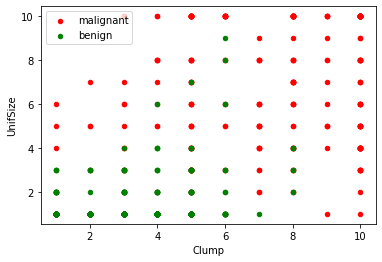

In [4]:
%matplotlib inline
l=data[data['Class'] == 4].plot(kind='scatter', x='Clump', y='UnifSize', color='r', label='malignant');
data[data['Class'] == 2].plot(kind='scatter', x='Clump', y='UnifSize', color='g', label='benign',ax=l);
plt.show()

In [5]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
data['BareNuc'][pd.to_numeric(data['BareNuc'],errors='coerce').isnull()]

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: BareNuc, dtype: object

In [12]:
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype('int')
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [15]:
x=data[np.array(data.columns[0:10:1])].values
x[0:5]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1]])

In [16]:
y=data[['Class']].values
y[0:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [18]:
x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.12366418,  0.19790469, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 , -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185,  0.26278299,  0.75803177,
         1.69516613,  1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 , -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [-0.09745928,  0.55267873,  1.58320366,  1.6021918 , -0.63936553,
        -0.10545357,  0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.09625642, -0.15686934, -0.70221201, -0.74177362,  0.05933312,
        -0.5556085 , -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

In [0]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=6)

In [20]:
s=svm.SVC(C=0.3,kernel='rbf')
s1=svm.SVC(C=0.3,kernel='linear')
s2=svm.SVC(C=0.3,kernel='poly')
s3=svm.SVC(C=0.3,kernel='sigmoid')
s.fit(train_x,train_y)
s1.fit(train_x,train_y)
s2.fit(train_x,train_y)
s3.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred=s.predict(test_x)
pred1=s1.predict(test_x)
pred2=s2.predict(test_x)
pred3=s3.predict(test_x)

In [23]:
print("accuracy with rbf is",metrics.accuracy_score(test_y,pred))
print("accuracy with linear is",metrics.accuracy_score(test_y,pred1))
print("accuracy with poly is",metrics.accuracy_score(test_y,pred2))
print("accuracy with sigmoid is",metrics.accuracy_score(test_y,pred3))

accuracy with rbf is 0.975609756097561
accuracy with linear is 0.975609756097561
accuracy with poly is 0.9512195121951219
accuracy with sigmoid is 0.975609756097561
